In [1]:
import random
import os
import cv2
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
def create_data(CATEGORIES,DATADIR,IMG_SIZE):## chargement du dataset(ensembles des images 'with-accident' et 'without-accident')
    data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):   
            try:
                img_array = cv2.imread(os.path.join(path,img))   
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                data.append([img_array, class_num])  
            except Exception as e:  
                pass
    return data 

In [3]:
#(création des données d'entrainement et du test)
IMG_SIZE = 300 
cat = ['Accident','No Accident']
data_path = 'C:/dataV3/'

data = create_data(cat, data_path, IMG_SIZE)

print("training_data :",len(data)) 

training_data : 1621


In [4]:
lenofimage=len(data)

In [7]:
#séparation des images et leurs labels
def lebalization(data):
    random.shuffle(data) 
    X = []
    y = []
    for features,label in data:
        X.append(features)
        y.append(label)
    return  X,y

In [8]:
X,y = lebalization(data) 

In [9]:
#normalization des images 
X= np.array(X).reshape(lenofimage,-1) 
y= np.array(y)

In [10]:
x_train, x_test,y_train, y_test=train_test_split(X,y,test_size=0.2)  

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
knn = KNeighborsClassifier(n_neighbors=35) 

In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [14]:
knn.score(x_test, y_test)

0.7046153846153846

In [15]:
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    else:
        1 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to calculate accuracy 
def cal_accuracy(model,X_test,y_test): 
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    print ("Accuracy : ", round(accuracy_score(y_test,y_pred)*100,2))
    print ("Precision : ", round(precision_score(y_test,y_pred)*100,2))
    print ("Sensitivity / Recall : ", round(recall_score(y_test,y_pred)*100,2))
    print ("F1_score : ", round(f1_score(y_test,y_pred)*100,2)) 
    cnf_matrix_tra = confusion_matrix(y_test, y_pred)
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
    plt.show()
    print("Report : ") 
    print(classification_report(digits=6,y_true=y_test, y_pred=y_pred)) 

Accuracy :  70.46
Precision :  70.83
Sensitivity / Recall :  71.69
F1_score :  71.26


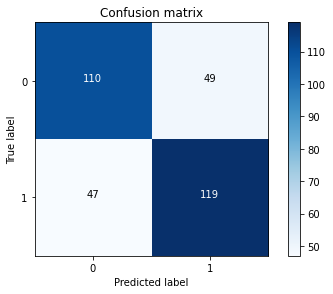

Report : 
              precision    recall  f1-score   support

           0   0.700637  0.691824  0.696203       159
           1   0.708333  0.716867  0.712575       166

    accuracy                       0.704615       325
   macro avg   0.704485  0.704346  0.704389       325
weighted avg   0.704568  0.704615  0.704565       325



In [16]:
cal_accuracy(knn,x_test, y_test)

In [18]:
import sklearn.metrics as metrics
probs = knn.predict(x_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

KeyboardInterrupt: 

Enter URL of Image :c:/01.jpg
1
car No Accident


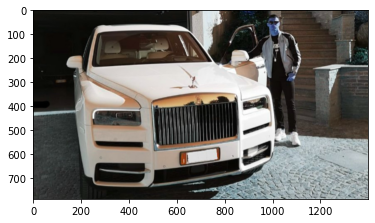

In [32]:
url=input('Enter URL of Image :')
CAT = ['Accident','No Accident']
 
    
#img=imread(url)
img=cv2.imread(url)
plt.imshow(img) 
img_resize = cv2.resize(img, (300, 300))  
l=[img_resize.flatten()]

y_predicted = model.predict(l)
print(y_predicted[0]) 
print("car",CAT[int(y_predicted[0])]) 

In [ ]:
pickle.dump(knn, open('Model_KNN_70%.pickle', 'wb'))

In [19]:
md = pickle.load(open('Model_KNN_70%.pickle', 'rb'))

In [21]:
md.score(x_test, y_test)

0.7846153846153846